# PREPARANDO O DATASET PARA MODELAGEM DE DADOS

Uma empresa de e-commerce precisa de uma análise de RFM (Recência, Frequência e Ticket Médio) dos seus clientes. O objetivo do projeto é processar um dataset em CSV contendo informações das transações e gerar um novo arquivo CSV com os dados dos clientes e suas respectivas métricas RFM. Esse projeto servirá como base para análises estratégicas e segmentação de clientes do e-commerce.

In [ ]:
'''O trabalho foi dividido em 10 entregas e para cada entrega será necessário o uso de algumas bibliotecas.'''
#Importação das bibliotecas necessárias:
import pandas as pd  # Manipulação de dados
import numpy as np  # Cálculo de percentis para detectar outliers
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Visualizações estatísticas
import datetime  # Cálculo de recência

# Etapa 01. Leia o arquivo e inspecione os dados

In [ ]:
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')  # O encoding evita erros de caracteres

In [ ]:
#Ver primeiras linhas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Ver resumo das colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Ver estatísticas das colunas numéricas
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Etapa 02. Valores faltantes na identificação do cliente

In [ ]:
#Encontrar valores nulos nas colunas
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Remover registros onde 'CustomerID' é nulo (NaN)
df = df.dropna(subset=['CustomerID'])

# Verificar se as remoções foram feitas corretamente
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


# Etapa 03. Preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
'''Primeiro, precisamos verificar se existem valores nulos ou menores ou iguais a zero na coluna UnitPrice.'''
precos_negativos_ou_nulos = df[df['UnitPrice'] <= 0]

In [ ]:
# Exibir as linhas com valores inválidos de preço
print(precos_negativos_ou_nulos)

       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   

In [ ]:
# Filtrar para manter apenas preços maiores que zero
df = df[df['UnitPrice'] > 0]

In [ ]:
'''Agora, precisamos verificar se existem valores nulos ou menores ou iguais a zero na coluna Quantity.'''
quantidades_negativas_ou_nulas = df[df['Quantity'] <= 0]

In [ ]:
# Exibir as linhas com valores inválidos de quantidade
print(quantidades_negativas_ou_nulas)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0

In [ ]:
# Filtrar para manter apenas quantidades maiores que zero
df = df[df['Quantity'] > 0]

In [ ]:
# Confirmação de que não há valores inválidos.
print(f"Preços menores ou iguais a zero: {len(df[df['UnitPrice'] <= 0])}")
print(f"Quantidades menores ou iguais a zero: {len(df[df['Quantity'] <= 0])}")

Preços menores ou iguais a zero: 0
Quantidades menores ou iguais a zero: 0


# Etapa 04. Verifique se existem linhas duplicadas

In [ ]:
#Verificando duplicatas
duplicadas = df[df.duplicated()]
print(duplicadas)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25

In [ ]:
# Removendo as linhas duplicadas
df = df.drop_duplicates()

# Verificando se as duplicatas foram removidas
print(f"DataFrame após remover duplicatas: {df.shape}")

DataFrame após remover duplicatas: (392692, 8)


# Etapa 05. Tipos de dados da coluna

In [ ]:
# Verificando o tipo de dado de cada coluna
print(df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [ ]:
'''Ao converter para int, você garante que CustomerID será tratado de forma apropriada,
sem valores nulos e com a possibilidade de ser utilizado em análises de maneira eficiente.'''
# Convertendo 'CustomerID' para int
df['CustomerID'] = df['CustomerID'].astype(int)

# Verificar o tipo de dado após a conversão
print(df['CustomerID'].dtype)

int64


<ipython-input-426-6f05997f4ee8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [ ]:
'''Ao tratar InvoiceDate como datetime, você facilita a análise e evita problemas de interpretação de dados temporais,
garantindo que as operações de data sejam realizadas corretamente.'''
# Convertendo 'InvoiceDate' para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Verificar o tipo de dado após a conversão
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [ ]:
#Resultados completos após a conversão
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


# Etapa 06. Tratando os outliers

<Axes: >

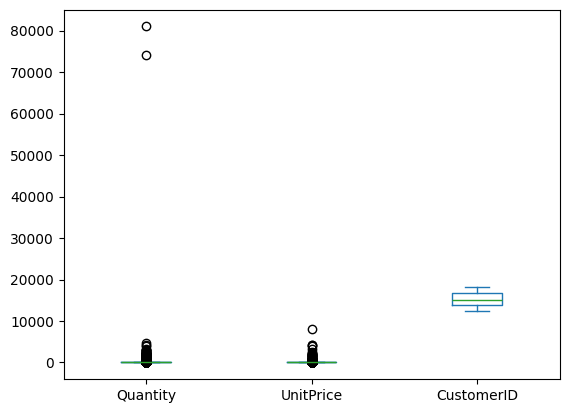

In [ ]:
#Verificando a existência de outliers
df.plot.box()

In [ ]:
#Retorna a quantidade total de outliers
outliers_quantity = is_outlier(df['Quantity']).sum()
outliers_unitprice = is_outlier(df['UnitPrice']).sum()

print(f"Outliers em Quantity: {outliers_quantity}")
print(f"Outliers em UnitPrice: {outliers_unitprice}")

Outliers em Quantity: 25616
Outliers em UnitPrice: 34112


In [ ]:
# Filtrando valores em que a quantidade do item na compra é superior a 10.000 e o preço unitário é maior que 5.000.
df_cleaned = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]

In [ ]:
print(f"Linhas antes da remoção: {len(df)}")
print(f"Linhas após a remoção: {len(df_cleaned)}")

# Checando se ainda existem outliers extremos
print(f"Máximo de Quantity após remoção: {df_cleaned['Quantity'].max()}")
print(f"Máximo de UnitPrice após remoção: {df_cleaned['UnitPrice'].max()}")

Linhas antes da remoção: 392692
Linhas após a remoção: 392689
Máximo de Quantity após remoção: 4800
Máximo de UnitPrice após remoção: 4161.06


# Etapa 07. Crie uma coluna adicional

In [ ]:
#Criando uma coluna adicional com o preço total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Verificando as primeiras linhas para confirmar
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34


# Etapa 08. Última data

In [ ]:
'''Cálculo da data da última compra no dataset como um todo, pois vamos utilizar este valor como data de comparação
para cálculo da recência.'''
# Calculando a data da última compra utilizando a função max() na coluna InvoiceDate.
last_purchase_date = df['InvoiceDate'].max()

# Exibindo o resultado
print(f'Data da última compra no dataset: {last_purchase_date}')


Data da última compra no dataset: 2011-12-09 12:50:00


# Etapa 09. Plotando gráficos

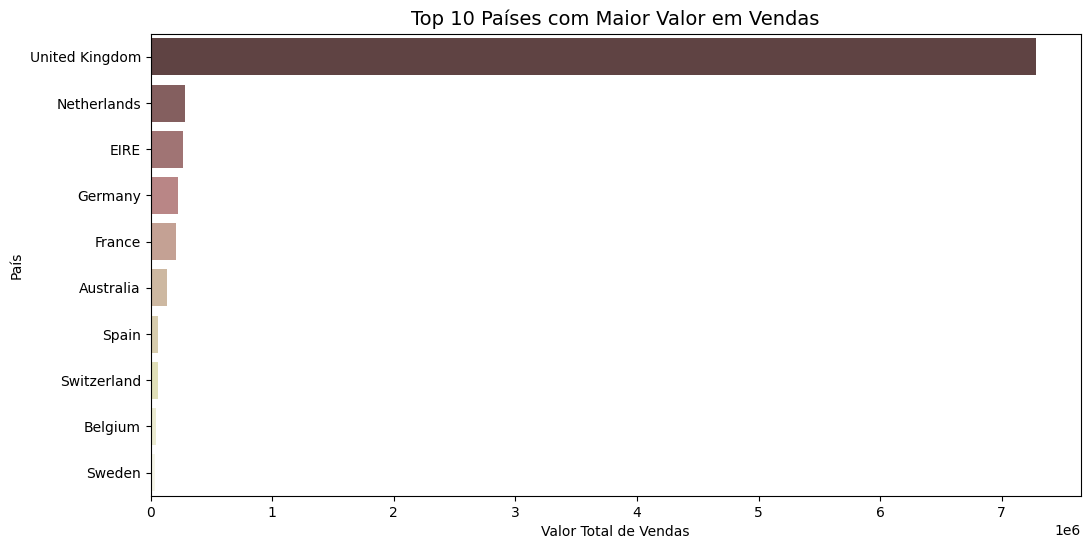

In [ ]:
'''Top 10 países com maior valor em vendas'''

# Agrupando por país e somando as vendas
top_countries = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="pink", legend=False)

# Adicionando título e rótulos
plt.title("Top 10 Países com Maior Valor em Vendas", fontsize=14)
plt.xlabel("Valor Total de Vendas")
plt.ylabel("País")

# Exibir o gráfico
plt.show()

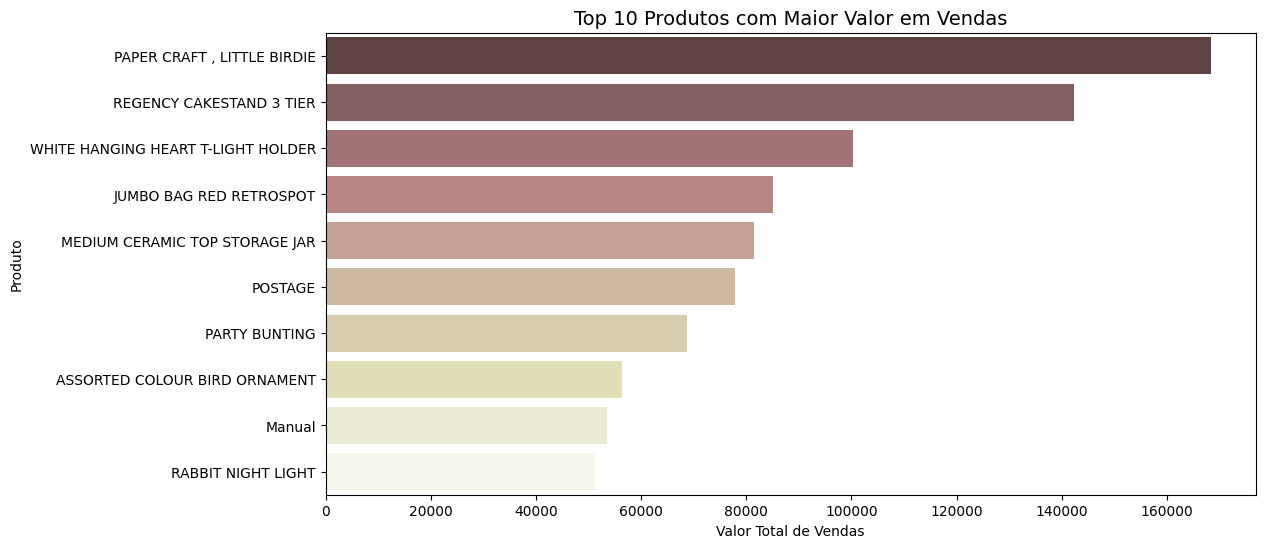

In [ ]:
'''Top 10 produtos mais vendidos'''

# Agrupando por produto e somando as vendas
top_Description = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=top_Description, y=top_Description.index, hue=top_Description.index, palette="pink", legend=False)

# Adicionando título e rótulos
plt.title("Top 10 Produtos com Maior Valor em Vendas", fontsize=14)
plt.xlabel("Valor Total de Vendas")
plt.ylabel("Produto")

# Exibir o gráfico
plt.show()

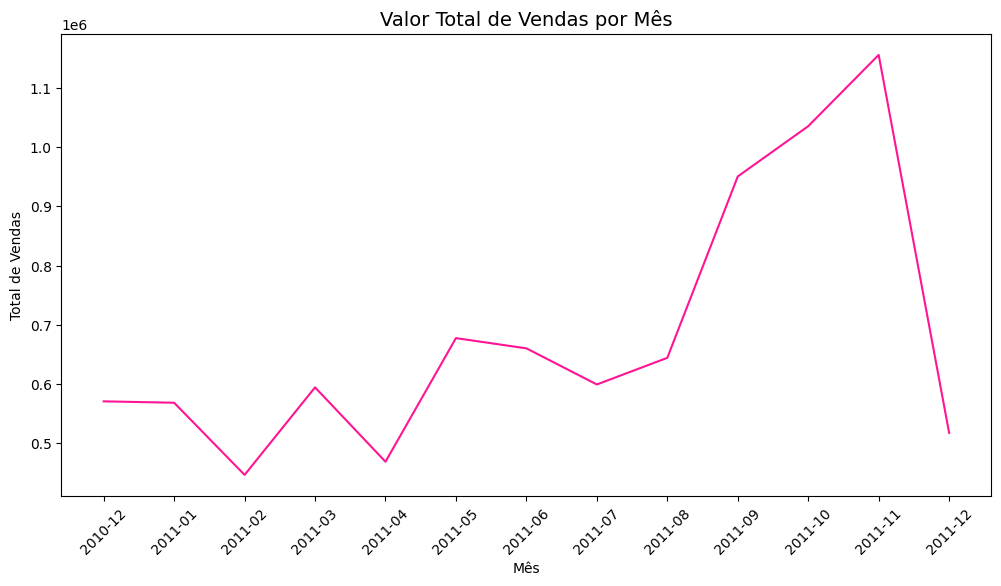

In [ ]:
'''Valor de venda total por mês'''

# Criar uma coluna com o ano e mês
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")

# Agrupar por mês e somar as vendas
monthly_sales = df.groupby("YearMonth")["TotalPrice"].sum()

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, color="deeppink")

# Adicionando título e rótulos
plt.title("Valor Total de Vendas por Mês", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X

# Exibir o gráfico
plt.show()

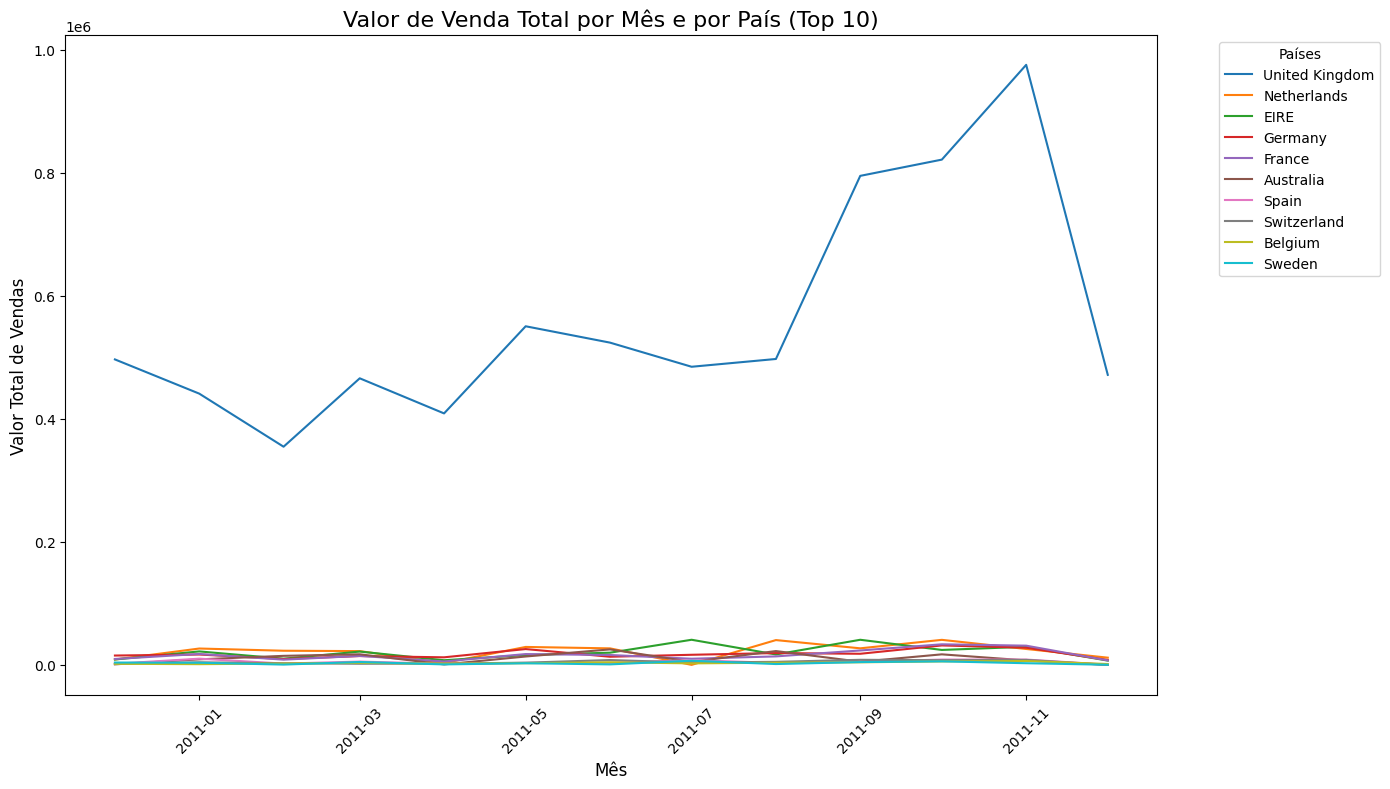

In [ ]:
'''Top 10 países com maior valor de vendas mensais'''

# Converter a coluna 'Month' para o formato de data
sales_melted['Month'] = sales_melted['Month'].dt.to_timestamp()

# Plotar o gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_melted, x="Month", y="TotalSales", hue="Country", palette="tab10", dashes=False)
plt.title("Valor de Venda Total por Mês e por País (Top 10)", fontsize=16)
plt.xlabel("Mês", fontsize=12)
plt.ylabel("Valor Total de Vendas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Etapa 10. Cálculo do RFM

In [ ]:
# Certificando-se de que a coluna InvoiceDate está no formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Agrupar por cliente e pedido, obtendo a data e preço total do pedido
df_grouped = df.groupby(['CustomerID', 'InvoiceNo']).agg(
    TotalPrice=('TotalPrice', 'sum'),
    InvoiceDate=('InvoiceDate', 'max')
).reset_index()

In [ ]:
# Agrupar por cliente para calcular o RFM
# Recência (R): diferença em dias da última compra do cliente até a última compra no dataset
last_purchase_date = df['InvoiceDate'].max()  # Última compra no dataset
df_rfm = df_grouped.groupby('CustomerID').agg(
    Recencia=('InvoiceDate', lambda x: (last_purchase_date - x.max()).days),
    Frequencia=('InvoiceNo', 'nunique'),  # Número de compras por cliente
    TicketMedio=('TotalPrice', 'mean')  # Preço médio das compras)
).reset_index()

# Exibindo o resultado
print(df_rfm.head())

   CustomerID  Recencia  Frequencia   TicketMedio
0       12346       325           1  77183.600000
1       12347         1           7    615.714286
2       12348        74           4    449.310000
3       12349        18           1   1757.550000
4       12350       309           1    334.400000


In [ ]:
# Gerando o CSV
df_rfm.to_csv('clientes_rfm.csv', index=False)

print("Arquivo CSV gerado com sucesso!")

Arquivo CSV gerado com sucesso!


In [ ]:
import time

print("\n" + "="*50)
print("🎓 PARABÉNS! Você concluiu o último módulo! 🎉")
print("Agora é hora de receber seu DIPLOMA! 📜")
print("="*50)

# Pequena animação de contagem regressiva
for i in range(3, 0, -1):
    print(f"Gerando diploma em... {i} segundos 🕒")
    time.sleep(1)

print("\n✅ DIPLOMA GERADO COM SUCESSO! 🎓")
print("Muito obrigada 🚀👏\n")


🎓 PARABÉNS! Você concluiu o último módulo! 🎉
Agora é hora de receber seu DIPLOMA! 📜
Gerando diploma em... 3 segundos 🕒
Gerando diploma em... 2 segundos 🕒
Gerando diploma em... 1 segundos 🕒

✅ DIPLOMA GERADO COM SUCESSO! 🎓
Muito obrigada DNC 🚀👏

